# Open Streets : Redirecting Traffic with Predictive Modeling in NYC

## Abstract

## Introduction

In 2030, the expected population of the world will be over 8 billion and 60% of it will be located in urban areas. The rapid growth raises urban challenges of a magnitude that architects and urbanist have never dealt with before. One of the key challenges is to be able to remove cars from cities due to the expected quantity but also the impact on the environment and mobility. Although we can start to design our new cities with less car and a focus on walkability, there are plenty of existing cities such as New York that have evolved through the years to carry people with a mix of cars, taxis and mass transportation. Recent efforts have improved the mass transportation quality and opportunities for walking and biking. Nevertheless, a crisis such as COVID-19 demonstrated the need in the future for people to take over the streets to create more pedestrian focus citiesand extended storefronts that invite the community to gather.

The more complex these challenges become the harder it is to find solutions with traditional methods that dealt with different priorities. Everyday millions of traffic related observations are generated in the form of data that informs how humans "move" in cities. Technology has proven to benefit our society and for challenges of this magnitude a creative and innovative method is imperative to foresee and solve for the future urban density.

Using open data available from NYC, this project envisions to perform an analysis on current car traffic patterns in New York City. Based on the information from cars and taxis at different times of day, I will create a model as accurate as possible to predict how traffic may be redirected with certain streets closed. Historically, there are commercial corridors that expand from East to West of the city that are often vibrant and full of people but based on the Comissioners Plan (1811), they are wider streets that day to day are the path to thousands of cars. The model will explore the impact of returning the street scape to pedestrians on these areas of opportunity as well as compare narrower less busy streets. The use of data analysis, visualization and predictive model will inform this project to create a creative proposal of potential pedestrian-only streets in the city of New York. 

## Research Questions

1. How can we determine the most and least traveled streets by cars, based on trip counts and car volume, that can potentially be transfered to pedestrian-only access?
2. What is the impact on traffic and mobility in New York when we close certain streets for pedestrian-only access?
3. How can we determine the optimal time of day on a monthyl basis for temporary closure of streets?

## Key Assumptions

Since 2016, the population in NYC has decreased by about 100k people, meaning that currently there are 8.3M inhabitants in New York City. However it is projected that there will be a growth in population by 2030. For this project, we will assume the population stops decreasing and by 2026 it is back at 8.4M and increases to 8.5M by 2030.

Moreover, given that our data is from 2014-2019 we have observations with varios populations numbers by year that range within our assumption so we will not do any trip volume projection.

## Data to be Used

The proposed data for this scope is sourced from New York Open Data and it will combine a series of publicly available structured data sets.
1. **Traffic Volume** (2014-2019) - CSV: Traffic volume counts collected by DOT for New York Metropolitan Transportation Council (NYMTC) to validate theNew York Best Practice Model (NYBPM). [Source](https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts-2014-2019-/ertz-hr4r)
2. **NYC Street Centerline (CSCL)** - GeoJSON | CSV : The NYC Street Centerline (CSCL) is a road-bed representation of New York City streets containing address ranges and other information such as traffic directions, road types, segment types. [Source](https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b)
3. **Yellow Taxi Trip Data (2014-2019)** - CSV - One dataset per year: This dataset includes trip records from all trips completed in yellow taxis from in NYC. [Source](https://data.cityofnewyork.us/Transportation/2015-Yellow-Taxi-Trip-Data/ba8s-jw6u)
4. **Closed Street for Pothole Work Orders** - GeoJSON |CSV: The Street Pothole Work Orders data consists of closed street potholes inspected and repaired by the New York City Department of Transportation. [Source](https://data.cityofnewyork.us/Transportation/Street-Pothole-Work-Orders-Closed-Dataset-/x9wy-ing4)
5. **New York City Truck Routes** - GeoJSON | CSV: The New York City Truck Route Network is a set of roads that commercial vehicles must use in New York City. [Source](https://data.cityofnewyork.us/Transportation/New-York-City-Truck-Routes/jjja-shxy)

In [1]:
import pandas as pd
import geopandas as gpd

#traffic volume csv
traffic=pd.read_csv('https://raw.githubusercontent.com/AlejandraZS10/capstone_project/master/Traffic_Volume_Counts__2014-2019_.csv')
traffic.head(4)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/13/2014,204.0,177.0,133.0,...,520,611,573,546,582,528,432,328,282,240
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,09/13/2014,140.0,51.0,128.0,...,379,376,329,362,418,335,282,247,237,191
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,09/13/2014,94.0,73.0,65.0,...,280,272,264,236,213,190,199,183,147,103
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,09/13/2014,88.0,82.0,75.0,...,237,276,223,240,217,198,186,162,157,103


In [2]:
#truck routes
truck_routes = gpd.read_file('New York City Truck Routes.geojson')
truck_routes.head(4)

DriverError: New York City Truck Routes.geojson: No such file or directory

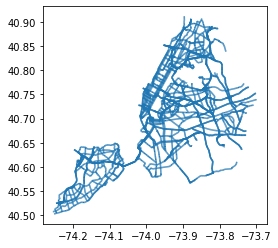

In [32]:
truck_routes.plot(figsize=(30, 15))

In [3]:
import pandas as pd
import geopandas as gpd

#pot holes volume csv
closed_streets=gpd.read_file('Street Pothole Work Orders - Closed (Dataset).geojson')
closed_streets.head(10)

,source,defnum,rptdate,toprimname,shape_leng,specloc,housenum,frmprimnam,boro,rptclosed,initby,onprimname,oft,onfacename,geometry
0,CTZ,DB2004287021,2004-10-13T00:00:00,BELT PARKWAY,109.124234309,SB ON BEDFORD_UNDERNEATH OVERPASS,None,BELT PARKWAY,B,2013-02-14T00:00:00,CSC,BEDFORD AVENUE,318630377030377030,BEDFORD AV,"MULTILINESTRING ((-73.94381 40.58499, -73.9438..."
1,CTZ,DB2006085009,2006-03-26T00:00:00,39 STREET,260.495098096,I/F/O B16 BUS STOP,None,38 STREET,B,2014-10-11T00:00:00,CSC,13 AVENUE,306380308480308530,13 AV,"MULTILINESTRING ((-73.98571 40.64119, -73.9862..."
2,CTZ,DB2007166005,2007-06-15T00:00:00,SCHENECTADY AVENUE,549.255973307,POTHOLE NEAR CURB I/F/O ADDRESS,1688,LEWIS AVENUE,B,2011-01-14T00:00:00,CSC,FULTON STREET,342730355530375430,FULTON ST,"MULTILINESTRING ((-73.93487 40.67959, -73.9343..."
3,CTZ,DB2009352004,2009-12-18T00:00:00,FULTON STREET,836.436669174,"4"" DEEP",45,DEKALB AVENUE,B,2010-01-06T00:00:00,CSC,ST FELIX STREET,380030331530342730,ST FELIX ST,"MULTILINESTRING ((-73.97794 40.68981, -73.9775..."
4,CTZ,DB2009362038,2009-12-28T00:00:00,OCEAN PARKWAY,385.456668198,ONE POTHOLE I/F/O DRIVE WAY RIGHT OFF THE CURB,514,EAST 5 STREET,B,2010-01-04T00:00:00,CSC,AVENUE C,313830335030367730,AV C,"MULTILINESTRING ((-73.97502 40.64076, -73.9739..."
5,CTZ,DB2009362066,2009-12-28T00:00:00,SEBA AVENUE,529.261510875,CLOSER TO SEBA AVE,None,LOIS AVENUE,B,2010-01-05T00:00:00,CSC,GAIN COURT,342890356960375990,GAIN CT,"MULTILINESTRING ((-73.92233 40.58629, -73.9235..."
6,CTZ,DB2009363041,2009-12-29T00:00:00,EAST 9 STREET,259.70633736,IN FRONT OF ADDRESS NEAR BUS STOP,808,EAST 8 STREET,B,2010-01-04T00:00:00,CSC,AVENUE J,314080335130335180,AV J,"MULTILINESTRING ((-73.96802 40.62445, -73.9671..."
7,CTZ,DB2009363045,2009-12-29T00:00:00,WYCKOFF AVENUE,708.233651411,2 POTHOLES IN FRONT OF 1402 HANCOCK ST,1402,IRVING AVENUE,B,2010-01-10T00:00:00,CSC,HANCOCK STREET,347030352130394730,HANCOCK ST,"MULTILINESTRING ((-73.90805 40.69542, -73.9070..."
8,CTZ,DB2009364034,2009-12-30T00:00:00,NEW MONTROSE AVENUE,304.584885979,SEVERAL ON STREET,None,HEWES STREET,B,2010-01-10T00:00:00,CSC,BROADWAY,323230349430364630,BDWY,"MULTILINESTRING ((-73.95291 40.70670, -73.9525..."
9,YRD,DB2009365020,2009-12-29T00:00:00,AVENUE L,879.424961519,None,1455,AVENUE K,B,2010-01-09T00:00:00,YRD,CONEY ISLAND AVENUE,328830314130314180,CONEY ISL AV,"MULTILINESTRING ((-73.96472 40.62237, -73.9642..."


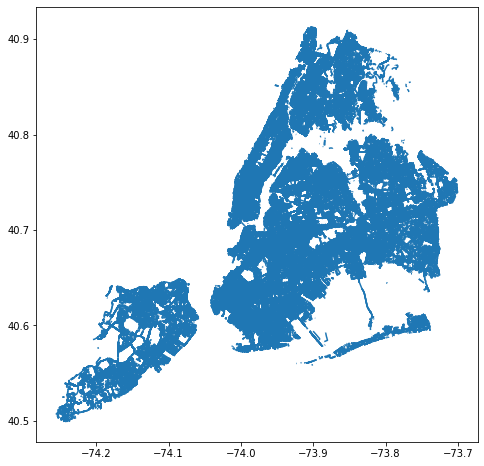

In [12]:
closed_streets.plot(figsize=(30, 15))

In [22]:
df_holes = pd.DataFrame(closed_streets.drop(columns='geometry'))
df_holes.dtypes

source        object
defnum        object
rptdate       object
toprimname    object
shape_leng    object
specloc       object
housenum      object
frmprimnam    object
boro          object
rptclosed     object
initby        object
onprimname    object
oft           object
onfacename    object
dtype: object

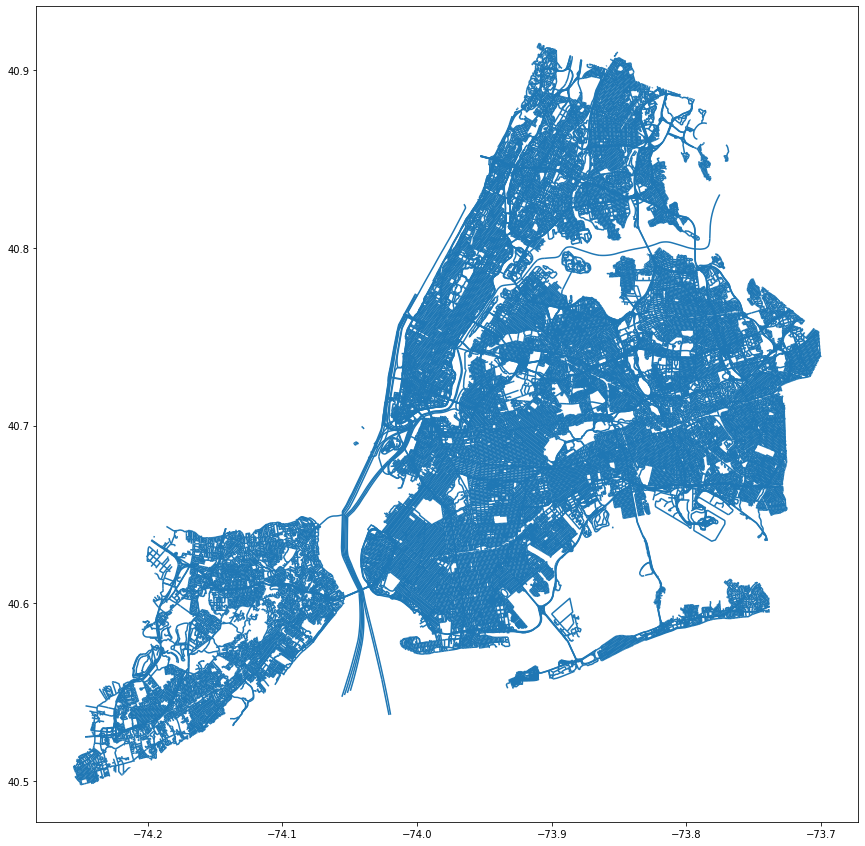

In [36]:
#truck routes
scl = gpd.read_file('NYC Street Centerline (CSCL).geojson')
scl.plot(figsize=(30, 15))

## Approach

With the use of the aforementioned datasets, I will create a series of models to predict the impact on trip rates if certain streets are closed and open to pedestrians. <br>
<br>
The current trip volume dataset will be where I will draw predictive variables from and I will use it side by side with the closed streets by pothole datset to asses how traffic was impacted on those dates. This will help me find predictive and a response variable. <br>
<br>
Moreover, I will use the truck routes dataset to find the impact on trip volumes and rates based on larger trucks and see if it's possible to discard those streets from the possible closed streets.
Lastly, I will use data visualization and domain knowledge to test certain streets on the model and assess the impact it has on traffic volume.

# Unsupervised 

### k-means clustering

The goal of the project is to identify streets that are possible candidates for pedestrian only access, however, we currently don't have a response variable because there is no precedent to this. Using the potholes dataset we know of streets that have closed at some point for certain time that can help us identify the impacts that it has had on traffic. 

We will use an unsupervised model to identify clusters of streets with "little to no impact", "lower impact", "medium impact" and "high impact" around the surrounding routes of the closed street. 

# Supervised 

### Random Forest 

We will use Random Forest algorithms to identify the best features to predict the response variable created from the unsupervised numeric model. Furthermore, domain knowledge will help us confirm the relationships of the variables identified by the algorithm.

# Supervised Categorical Model

### Classification

Lastly, we will create a variable that identifies a street as "Candidate for Pedestrian Only" or "Candidate for Car" using a classification model.

### SHAP Values

# Precedents

Spadon, G., Carvalho, A.C.P.L.F.d., Rodrigues-Jr, J.F. et al. Reconstructing commuters network using machine learning and urban indicators. Sci Rep 9, 11801 (2019). https://doi.org/10.1038/s41598-019-48295-x
- https://www.nature.com/articles/s41598-019-48295-x#citeas
- https://github.com/slundberg/shap

- https://deepmind.com/blog/article/traffic-prediction-with-advanced-graph-neural-networks
- Transdim: https://github.com/xinychen/transdim

Mahmuda Akhtar, Sara Moridpour, "A Review of Traffic Congestion Prediction Using Artificial Intelligence", Journal of Advanced Transportation, vol. 2021, Article ID 8878011, 18 pages, 2021. https://doi.org/10.1155/2021/8878011